In [2]:
# rasterio package is for openning GeoTIFF files
# https://mapbox.github.io/rasterio/installation.html
# go to that page for installation instructions

import numpy as np
import pandas as pd
# import rasterio
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
#plt.style.use('seaborn-whitegrid')

We have a satellite image of the crop fields in the US.

Date: 2016-08-06T17:28:01.000Z

<img src='images/image.png'>

Also, we have a ground truth mapping for different crop cultures.

<img src='images/crops.png'>

In [2]:
# load the data using rasterio
crops = rasterio.open('/Users/vasilii/Dropbox/minnesota/crops_map.tif').read(1)
band_01 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_01.tif').read(1)
band_02 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_02.tif').read(1)
band_03 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_03.tif').read(1)
band_04 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_04.tif').read(1)
band_05 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_05.tif').read(1)
band_06 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_06.tif').read(1)
band_07 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_07.tif').read(1)
band_08 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_08.tif').read(1)
band_8A = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_8A.tif').read(1)
band_09 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_09.tif').read(1)
band_10 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_10.tif').read(1)
band_11 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_11.tif').read(1)
band_12 = rasterio.open('/Users/vasilii/Dropbox/minnesota/band_12.tif').read(1)

In [3]:
# or load data using PIL
crops = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/crops_map.tif'))
band_01 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_01.tif'))
band_02 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_02.tif'))
band_03 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_03.tif'))
band_04 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_04.tif'))
band_05 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_05.tif'))
band_06 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_06.tif'))
band_07 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_07.tif'))
band_08 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_08.tif'))
band_8A = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_8A.tif'))
band_09 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_09.tif'))
band_10 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_10.tif'))
band_11 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_11.tif'))
band_12 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_12.tif'))

In [4]:
# check shapes
print(crops.shape)
print(band_01.shape)

(2724, 3816)
(2724, 3816)


The size of the image is 2724x3816 pixels. The satellite image consists of several layers, so-called 'bands' (each band corresponds to different image frequences). In this particullar example for simplicity reasons, I've downloaded only 4 bands, but there are 13 bands exist in total, which can be used for our task.

We will start from pixel-based classification, i.e. we have 2724x3816 pixels that are our objects to classify. Each pixel has 13 values (for different bands) that will compose our feature space. Also, based on these 13 values, different indexes can be calculated, for exapmle, NDVI vegetation index (it is related to features generation task). So, the feature space can be expanded.

For each pixel we have the ground truth labels, which represent different crop cultures. The labels are shown below. In this case, there are 36 different crops cultures, i.e. classes. So, the goal is to predict to which class each of the pixels on the satellite image belongs.

In [242]:
labels = np.unique(crops)
print(labels)
print('Total number of classes:', len(labels))

[  1   4   5   6  21  22  23  24  27  28  29  31  36  37  39  41  42  43
  44  53  58  59  61 111 121 122 123 124 131 141 142 143 152 176 190 195]
Total number of classes: 36


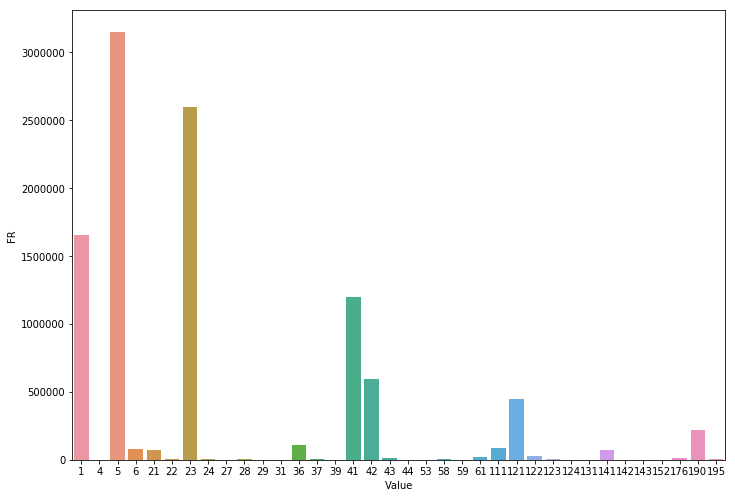

In [249]:
df = pd.DataFrame(data=labels,columns=["Value"])
df["FR"] = [len(np.where(crops==i)[0]) for i in labels]
plt.figure().set_size_inches(11.7, 8.27)
sns.barplot(x="Value",y="FR",data=df)
plt.show()

Below we are loading the CSV file with pixels' statistics, which also show the correspondance between labels and crops.

In [7]:
statistics = pd.read_csv('/Users/vasilii/Dropbox/minnesota/statistics.csv')

In [8]:
statistics

,Value,Category,Count,Acreage
0,1,Corn,183792,40874.4
1,4,Sorghum,6,1.3
2,5,Soybeans,350492,77947.5
3,6,Sunflowers,9106,2025.1
4,21,Barley,8371,1861.7
5,22,Durum Wheat,336,74.7
6,23,Spring Wheat,288999,64271.8
7,24,Winter Wheat,667,148.3
8,27,Rye,26,5.8
9,28,Oats,709,157.7


Show true map and example of one band.

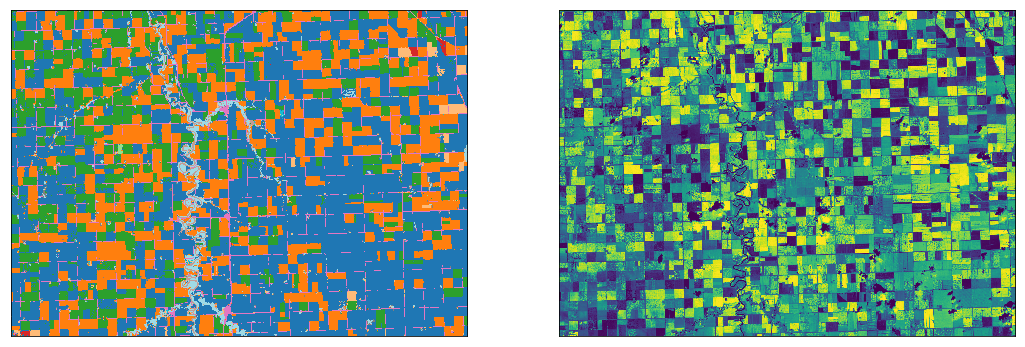

In [27]:
plt.figure(figsize=(18,50))
plt.subplot(1,2,1)
plt.imshow(crops, cmap='tab20')
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(band_08)
plt.xticks([])
plt.yticks([])
plt.show()

# Example 2-class classification (Spring Wheat vs. Corn)

In [10]:
example = np.zeros_like(crops)
example[np.where(crops==1)] = 1 # corn
example[np.where(crops==23)] = 2 # wheat

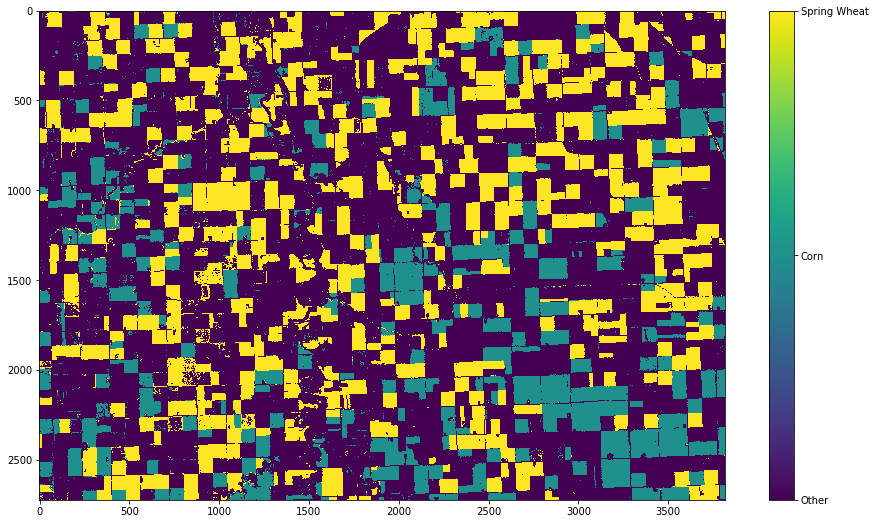

In [11]:
plt.figure(figsize=(16,9))
plt.imshow(example)
cbar = plt.colorbar(ticks=[2,1,0])
cbar.ax.set_yticklabels(['Spring Wheat', 'Corn', 'Other']) 
plt.show()

In [12]:
# create input and target spaces
X_corn = np.stack([band_01[np.where(crops==1)], band_02[np.where(crops==1)], band_03[np.where(crops==1)],
              band_04[np.where(crops==1)], band_05[np.where(crops==1)], band_06[np.where(crops==1)],
              band_07[np.where(crops==1)], band_08[np.where(crops==1)], band_8A[np.where(crops==1)],
              band_09[np.where(crops==1)], band_10[np.where(crops==1)], band_11[np.where(crops==1)], 
              band_12[np.where(crops==1)]], axis=1)

X_wheat = np.stack([band_01[np.where(crops==23)], band_02[np.where(crops==23)], band_03[np.where(crops==23)],
              band_04[np.where(crops==23)], band_05[np.where(crops==23)], band_06[np.where(crops==23)],
              band_07[np.where(crops==23)], band_08[np.where(crops==23)], band_8A[np.where(crops==23)],
              band_09[np.where(crops==23)], band_10[np.where(crops==23)], band_11[np.where(crops==23)], 
              band_12[np.where(crops==23)]], axis=1)

X = np.concatenate([X_corn, X_wheat])
y = np.concatenate([[1]*len(X_corn), [2]*len(X_wheat)])

In [13]:
print(X.shape)
print(y.shape)

(4253190, 13)
(4253190,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [16]:
X_train.shape

(850638, 13)

In [17]:
clf = DecisionTreeClassifier()
cross_val_score(clf, X_train, y_train)

array([0.97902633, 0.97921325, 0.97917445])

In [18]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
predicted = np.zeros_like(example[:,3000:])

In [20]:
for i in range(predicted.shape[0]):
    for j in range(predicted.shape[1]):
        if example[:,3000:][i,j] != 0:
            x = np.array([[band_01[i,3000+j], band_02[i,3000+j], band_03[i,3000+j], band_04[i,3000+j],
                      band_05[i,3000+j], band_06[i,3000+j], band_07[i,3000+j], band_08[i,3000+j],
                      band_8A[i,3000+j], band_09[i,3000+j], band_10[i,3000+j], band_11[i,3000+j],
                      band_12[i,3000+j]]])
            predicted[i,j] = clf.predict(x)

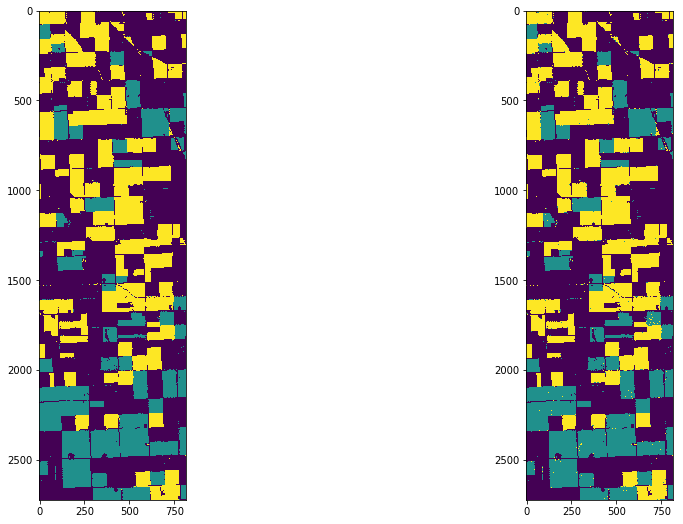

In [21]:
plt.figure(figsize=(16,9))
plt.subplot(121)
plt.imshow(example[:,3000:])
plt.subplot(122)
plt.imshow(predicted)
plt.show()

# Features' Distributions

In [4]:
corn = np.where(crops==1)
wheat = np.where(crops==23)
soybeans = np.where(crops==5)
drybeans = np.where(crops==42)
sugarbeets = np.where(crops==41)

In [5]:
print(corn[0].shape)
print(wheat[0].shape)
print(soybeans[0].shape)
print(drybeans[0].shape)
print(sugarbeets[0].shape)

(1653315,)
(2599875,)
(3152724,)
(594144,)
(1201371,)


In [6]:
sample_size = 1000
r = np.random.RandomState(26).choice(range(len(corn[0])), size=sample_size, replace=False)
corn = (corn[0][r], corn[1][r])
r = np.random.RandomState(26).choice(range(len(wheat[0])), size=sample_size, replace=False)
wheat = (wheat[0][r], wheat[1][r])
r = np.random.RandomState(26).choice(range(len(soybeans[0])), size=sample_size, replace=False)
soybeans = (soybeans[0][r], soybeans[1][r])
r = np.random.RandomState(26).choice(range(len(drybeans[0])), size=sample_size, replace=False)
drybeans = (drybeans[0][r], drybeans[1][r])
r = np.random.RandomState(26).choice(range(len(sugarbeets[0])), size=sample_size, replace=False)
sugarbeets = (sugarbeets[0][r], sugarbeets[1][r])

In [7]:
X_corn = np.stack([band_01[corn], band_02[corn], band_03[corn], band_04[corn], band_05[corn], band_06[corn], band_07[corn],
                   band_08[corn], band_8A[corn], band_09[corn], band_10[corn], band_11[corn], band_12[corn]], axis=1)

X_wheat = np.stack([band_01[wheat], band_02[wheat], band_03[wheat], band_04[wheat], band_05[wheat], band_06[wheat], band_07[wheat],
                    band_08[wheat], band_8A[wheat], band_09[wheat], band_10[wheat], band_11[wheat], band_12[wheat]], axis=1)

X_soybeans = np.stack([band_01[soybeans], band_02[soybeans], band_03[soybeans], band_04[soybeans], band_05[soybeans], 
                       band_06[soybeans], band_07[soybeans], band_08[soybeans], band_8A[soybeans], band_09[soybeans],
                       band_10[soybeans], band_11[soybeans], band_12[soybeans]], axis=1)

X_drybeans = np.stack([band_01[drybeans], band_02[drybeans], band_03[drybeans], band_04[drybeans], band_05[drybeans],
                       band_06[drybeans], band_07[drybeans], band_08[drybeans], band_8A[drybeans], band_09[drybeans], 
                       band_10[drybeans], band_11[drybeans], band_12[drybeans]], axis=1)

X_sugarbeets = np.stack([band_01[sugarbeets], band_02[sugarbeets], band_03[sugarbeets], band_04[sugarbeets], band_05[sugarbeets],
                         band_06[sugarbeets], band_07[sugarbeets], band_08[sugarbeets], band_8A[sugarbeets], band_09[sugarbeets],
                         band_10[sugarbeets], band_11[sugarbeets], band_12[sugarbeets]], axis=1)

In [8]:
X = np.vstack((X_corn, X_wheat, X_soybeans, X_drybeans, X_sugarbeets))
labels = np.hstack(([0]*len(X_corn), [1]*len(X_wheat), [2]*len(X_soybeans), [3]*len(X_drybeans), [4]*len(X_sugarbeets)))

In [10]:
X.shape

(5000, 13)

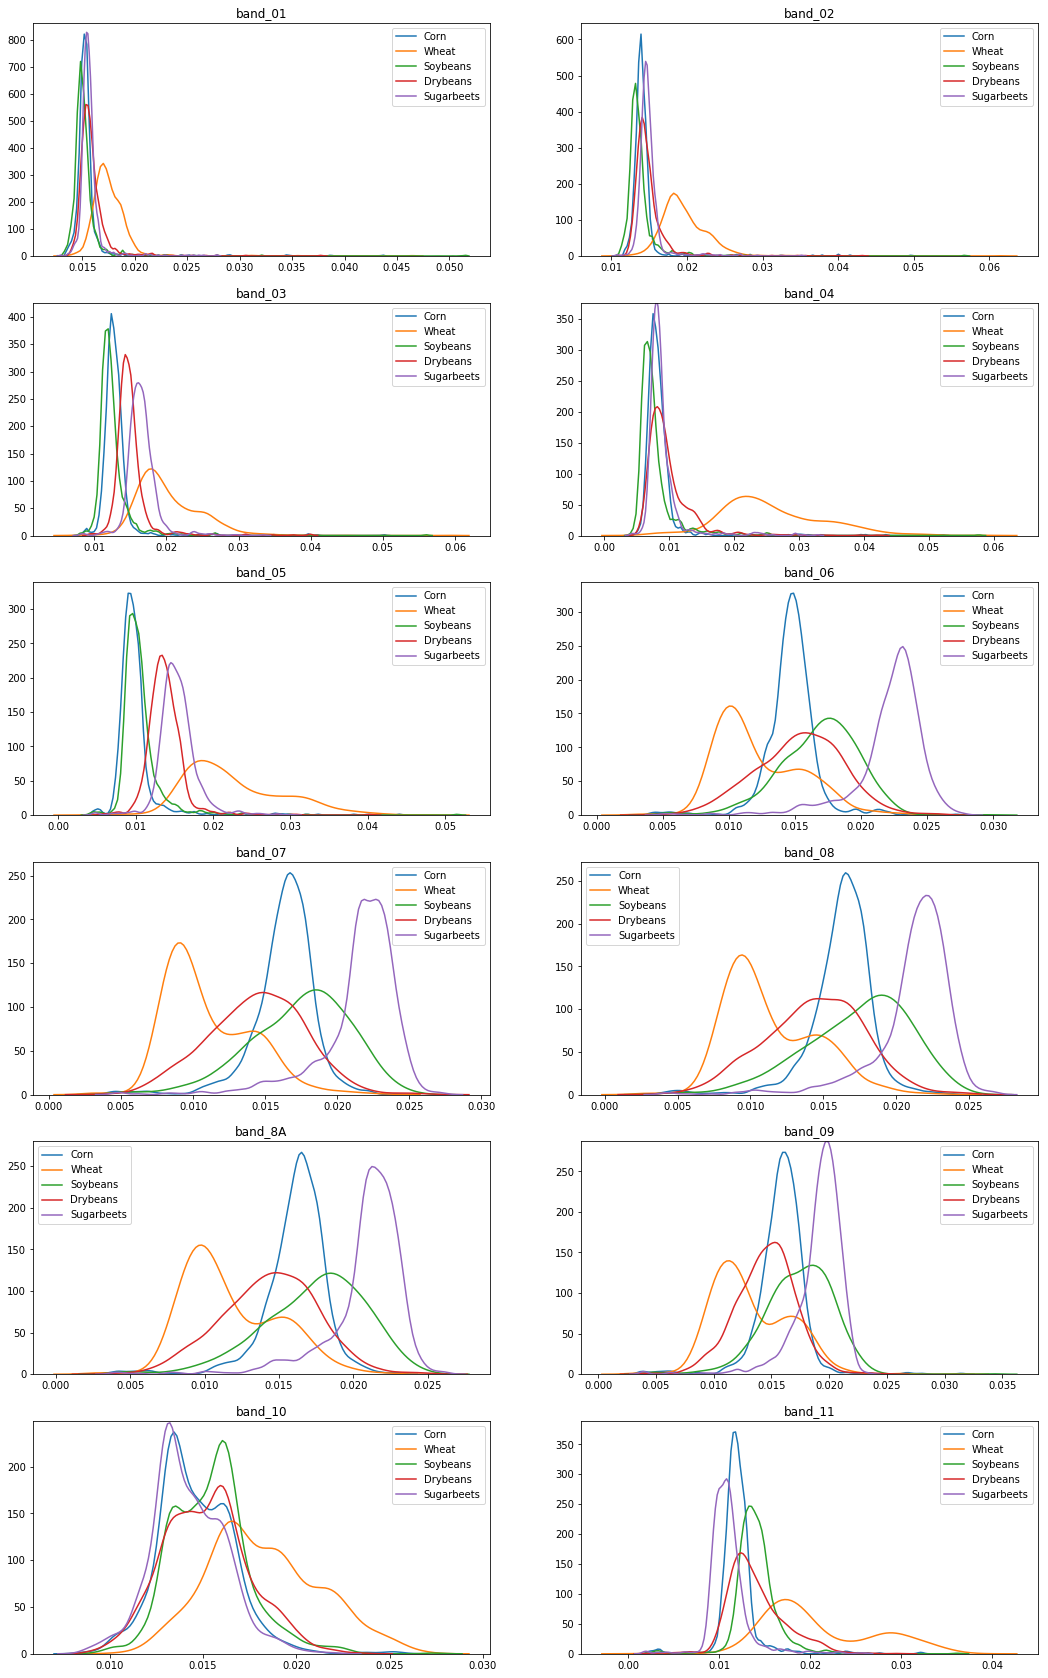

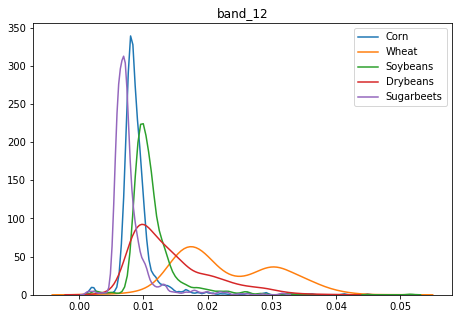

In [29]:
names=["band_01","band_02","band_03","band_04","band_05","band_06","band_07","band_08","band_8A","band_09","band_10","band_11","band_12"]
fig, axes = plt.subplots(6, 2, figsize=(18, 30))
sub_1=0
sub_2=0
for i in range(12):
    #plt.figure(figsize=(9,5))
    sns.distplot(X_corn[:,i], hist=False,label="Corn",ax=axes[sub_1,sub_2])
    sns.distplot(X_wheat[:,i], hist=False,label="Wheat",ax=axes[sub_1,sub_2])
    sns.distplot(X_soybeans[:,i], hist=False,label="Soybeans",ax=axes[sub_1,sub_2])
    sns.distplot(X_drybeans[:,i], hist=False,label="Drybeans",ax=axes[sub_1,sub_2])
    sns.distplot(X_sugarbeets[:,i], hist=False,label="Sugarbeets",ax=axes[sub_1,sub_2])
    axes[sub_1,sub_2].set_title(names[i])
    #plt.show()
    if sub_2==1:
        sub_1=sub_1+1
        sub_2=0
    else:
        sub_2=sub_2+1
plt.figure(figsize=(7.5,5))
sns.distplot(X_corn[:,12], hist=False,label="Corn")
sns.distplot(X_wheat[:,12], hist=False,label="Wheat")
sns.distplot(X_soybeans[:,12], hist=False,label="Soybeans")
sns.distplot(X_drybeans[:,12], hist=False,label="Drybeans")
sns.distplot(X_sugarbeets[:,12], hist=False,label="Sugarbeets")
plt.title(names[12])
plt.show()

Try to increase contrast in all bands by using `equalize_hist` from `skimage`.

In [18]:
from skimage.exposure import equalize_hist

In [19]:
band_01 = equalize_hist(band_01)
band_02 = equalize_hist(band_02)
band_03 = equalize_hist(band_03)
band_04 = equalize_hist(band_04)
band_05 = equalize_hist(band_05)
band_06 = equalize_hist(band_06)
band_07 = equalize_hist(band_07)
band_08 = equalize_hist(band_08)
band_8A = equalize_hist(band_8A)
band_09 = equalize_hist(band_09)
band_10 = equalize_hist(band_10)
band_11 = equalize_hist(band_11)
band_12 = equalize_hist(band_12)

In [14]:
corn = np.where(crops==1)
wheat = np.where(crops==23)
soybeans = np.where(crops==5)
drybeans = np.where(crops==42)
sugarbeets = np.where(crops==41)

In [15]:
print(corn[0].shape)
print(wheat[0].shape)
print(soybeans[0].shape)
print(drybeans[0].shape)
print(sugarbeets[0].shape)

(1653315,)
(2599875,)
(3152724,)
(594144,)
(1201371,)


In [16]:
sample_size = 1000
r = np.random.RandomState(26).choice(range(len(corn[0])), size=sample_size, replace=False)
corn = (corn[0][r], corn[1][r])
r = np.random.RandomState(26).choice(range(len(wheat[0])), size=sample_size, replace=False)
wheat = (wheat[0][r], wheat[1][r])
r = np.random.RandomState(26).choice(range(len(soybeans[0])), size=sample_size, replace=False)
soybeans = (soybeans[0][r], soybeans[1][r])
r = np.random.RandomState(26).choice(range(len(drybeans[0])), size=sample_size, replace=False)
drybeans = (drybeans[0][r], drybeans[1][r])
r = np.random.RandomState(26).choice(range(len(sugarbeets[0])), size=sample_size, replace=False)
sugarbeets = (sugarbeets[0][r], sugarbeets[1][r])

In [222]:
X_corn = np.stack([band_01[corn], band_02[corn], band_03[corn], band_04[corn], band_05[corn], band_06[corn], band_07[corn],
                   band_08[corn], band_8A[corn], band_09[corn], band_10[corn], band_11[corn], band_12[corn]], axis=1)

X_wheat = np.stack([band_01[wheat], band_02[wheat], band_03[wheat], band_04[wheat], band_05[wheat], band_06[wheat], band_07[wheat],
                    band_08[wheat], band_8A[wheat], band_09[wheat], band_10[wheat], band_11[wheat], band_12[wheat]], axis=1)

X_soybeans = np.stack([band_01[soybeans], band_02[soybeans], band_03[soybeans], band_04[soybeans], band_05[soybeans], 
                       band_06[soybeans], band_07[soybeans], band_08[soybeans], band_8A[soybeans], band_09[soybeans],
                       band_10[soybeans], band_11[soybeans], band_12[soybeans]], axis=1)

X_drybeans = np.stack([band_01[drybeans], band_02[drybeans], band_03[drybeans], band_04[drybeans], band_05[drybeans],
                       band_06[drybeans], band_07[drybeans], band_08[drybeans], band_8A[drybeans], band_09[drybeans], 
                       band_10[drybeans], band_11[drybeans], band_12[drybeans]], axis=1)

X_sugarbeets = np.stack([band_01[sugarbeets], band_02[sugarbeets], band_03[sugarbeets], band_04[sugarbeets], band_05[sugarbeets],
                         band_06[sugarbeets], band_07[sugarbeets], band_08[sugarbeets], band_8A[sugarbeets], band_09[sugarbeets],
                         band_10[sugarbeets], band_11[sugarbeets], band_12[sugarbeets]], axis=1)

In [223]:
X = np.vstack((X_corn, X_wheat, X_soybeans, X_drybeans, X_sugarbeets))
labels = np.hstack(([0]*len(X_corn), [1]*len(X_wheat), [2]*len(X_soybeans), [3]*len(X_drybeans), [4]*len(X_sugarbeets)))

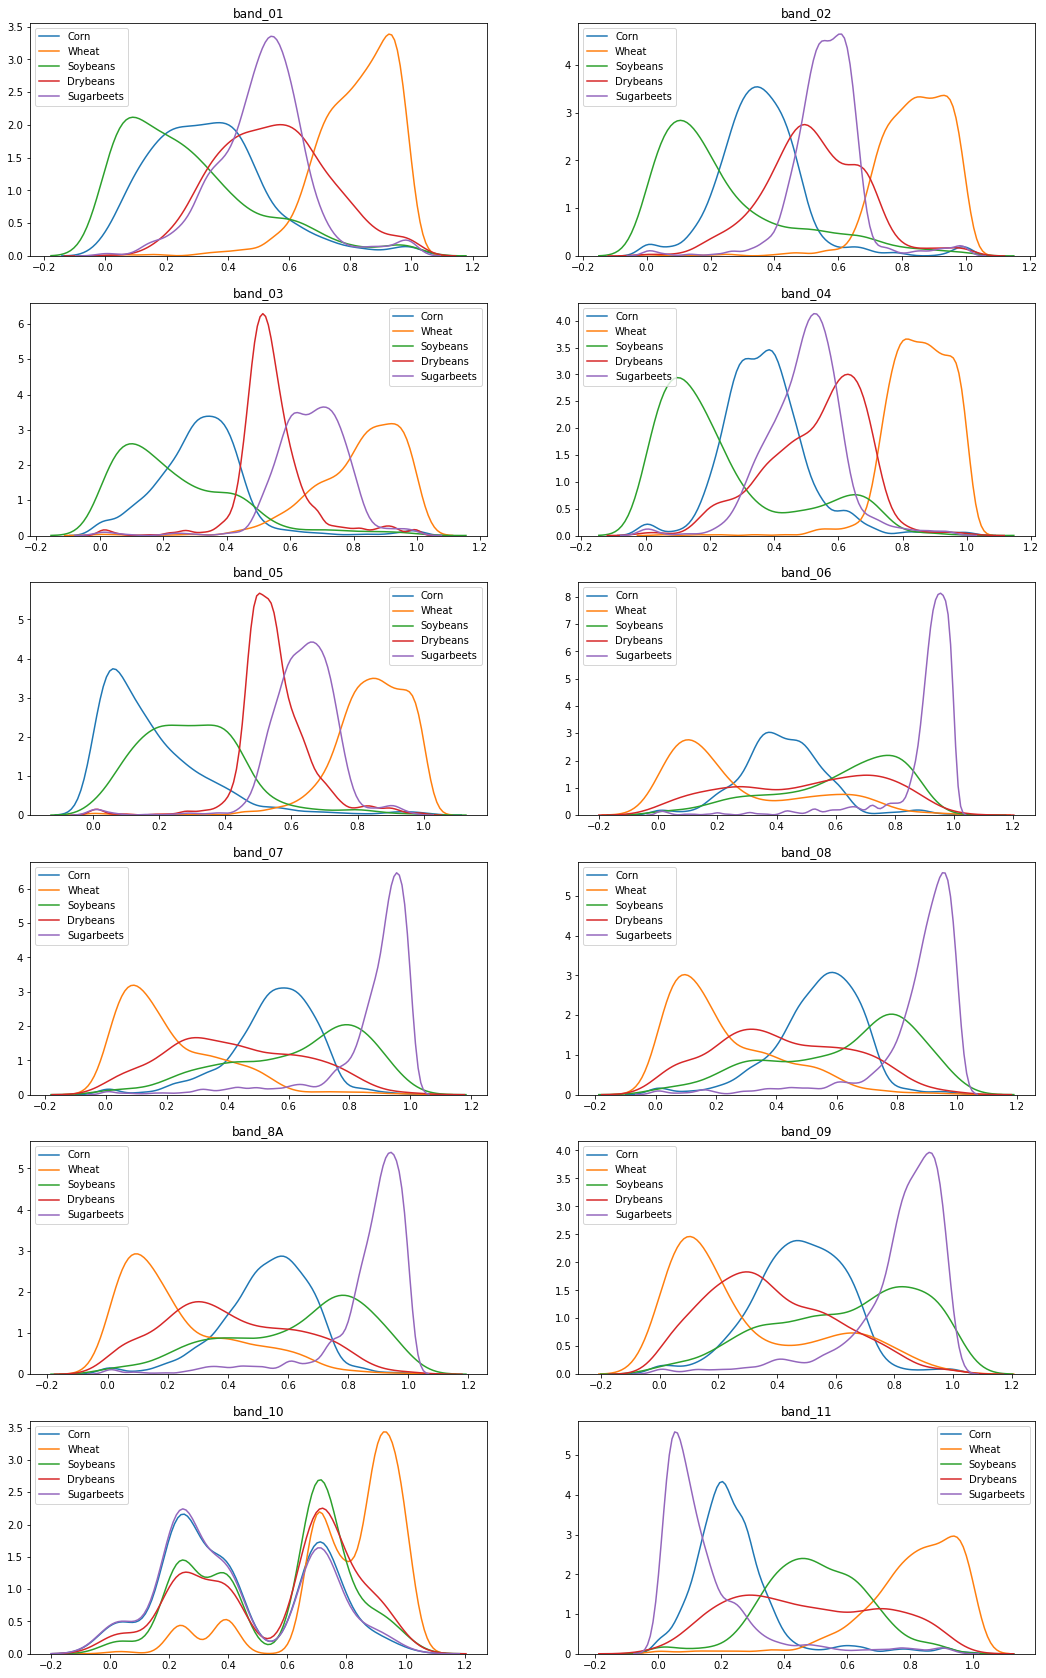

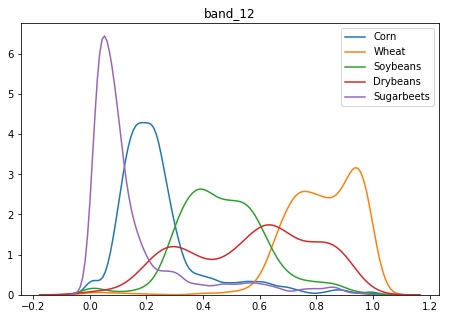

In [20]:
names=["band_01","band_02","band_03","band_04","band_05","band_06","band_07","band_08","band_8A","band_09","band_10","band_11","band_12"]
fig, axes = plt.subplots(6, 2, figsize=(18, 30))
sub_1=0
sub_2=0
for i in range(12):
    #plt.figure(figsize=(9,5))
    sns.distplot(X_corn[:,i], hist=False,label="Corn",ax=axes[sub_1,sub_2])
    sns.distplot(X_wheat[:,i], hist=False,label="Wheat",ax=axes[sub_1,sub_2])
    sns.distplot(X_soybeans[:,i], hist=False,label="Soybeans",ax=axes[sub_1,sub_2])
    sns.distplot(X_drybeans[:,i], hist=False,label="Drybeans",ax=axes[sub_1,sub_2])
    sns.distplot(X_sugarbeets[:,i], hist=False,label="Sugarbeets",ax=axes[sub_1,sub_2])
    axes[sub_1,sub_2].set_title(names[i])
    #plt.show()
    if sub_2==1:
        sub_1=sub_1+1
        sub_2=0
    else:
        sub_2=sub_2+1
plt.figure(figsize=(7.5,5))
sns.distplot(X_corn[:,12], hist=False,label="Corn")
sns.distplot(X_wheat[:,12], hist=False,label="Wheat")
sns.distplot(X_soybeans[:,12], hist=False,label="Soybeans")
sns.distplot(X_drybeans[:,12], hist=False,label="Drybeans")
sns.distplot(X_sugarbeets[:,12], hist=False,label="Sugarbeets")
plt.title(names[12])
plt.show()

# Vegetation Indexes

In [24]:
crops = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/crops_map.tif'))
band_01 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_01.tif'))
band_02 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_02.tif'))
band_03 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_03.tif'))
band_04 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_04.tif'))
band_05 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_05.tif'))
band_06 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_06.tif'))
band_07 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_07.tif'))
band_08 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_08.tif'))
band_8A = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_8A.tif'))
band_09 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_09.tif'))
band_10 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_10.tif'))
band_11 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_11.tif'))
band_12 = np.array(Image.open('/Users/vasilii/Dropbox/minnesota/band_12.tif'))

In [27]:
ndvi_wo_equalization = (band_08 - band_04) / (band_08 + band_04)
lswi_wo_equalization = (band_08 - band_11) / (band_08 + band_11)

In [28]:
ndvi_1_wo_equalization = ndvi_wo_equalization[np.where(crops==1)]
ndvi_2_wo_equalization = ndvi_wo_equalization[np.where(crops==23)]
ndvi_3_wo_equalization = ndvi_wo_equalization[np.where(crops==5)]
ndvi_4_wo_equalization = ndvi_wo_equalization[np.where(crops==42)]
ndvi_5_wo_equalization = ndvi_wo_equalization[np.where(crops==41)]

lswi_1_wo_equalization = lswi_wo_equalization[np.where(crops==1)]
lswi_2_wo_equalization = lswi_wo_equalization[np.where(crops==23)]
lswi_3_wo_equalization = lswi_wo_equalization[np.where(crops==5)]
lswi_4_wo_equalization = lswi_wo_equalization[np.where(crops==42)]
lswi_5_wo_equalization = lswi_wo_equalization[np.where(crops==41)]

In [33]:
band_01 = equalize_hist(band_01)
band_02 = equalize_hist(band_02)
band_03 = equalize_hist(band_03)
band_04 = equalize_hist(band_04)
band_05 = equalize_hist(band_05)
band_06 = equalize_hist(band_06)
band_07 = equalize_hist(band_07)
band_08 = equalize_hist(band_08)
band_8A = equalize_hist(band_8A)
band_09 = equalize_hist(band_09)
band_10 = equalize_hist(band_10)
band_11 = equalize_hist(band_11)
band_12 = equalize_hist(band_12)

In [34]:
ndvi = (band_08 - band_04) / (band_08 + band_04)
lswi = (band_08 - band_11) / (band_08 + band_11)

In [35]:
ndvi_1 = ndvi[np.where(crops==1)]
ndvi_2 = ndvi[np.where(crops==23)]
ndvi_3 = ndvi[np.where(crops==5)]
ndvi_4 = ndvi[np.where(crops==42)]
ndvi_5 = ndvi[np.where(crops==41)]

lswi_1 = lswi[np.where(crops==1)]
lswi_2 = lswi[np.where(crops==23)]
lswi_3 = lswi[np.where(crops==5)]
lswi_4 = lswi[np.where(crops==42)]
lswi_5 = lswi[np.where(crops==41)]

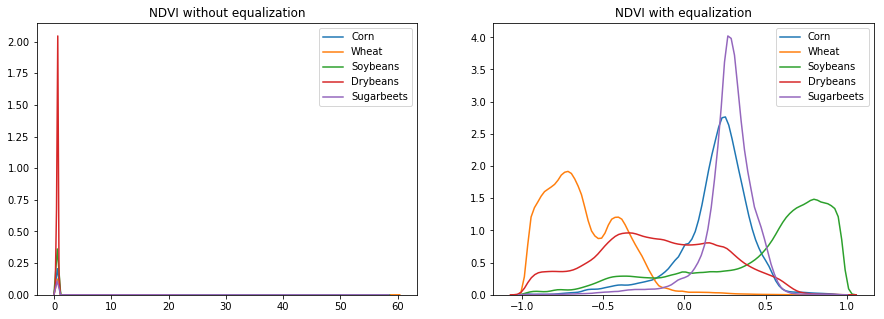

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(ndvi_1_wo_equalization, hist=False,label="Corn")
sns.distplot(ndvi_2_wo_equalization, hist=False,label="Wheat")
sns.distplot(ndvi_3_wo_equalization, hist=False,label="Soybeans")
sns.distplot(ndvi_4_wo_equalization, hist=False,label="Drybeans")
sns.distplot(ndvi_5_wo_equalization, hist=False,label="Sugarbeets")
plt.title("NDVI without equalization")
plt.subplot(122)
sns.distplot(ndvi_1, hist=False,label="Corn")
sns.distplot(ndvi_2, hist=False,label="Wheat")
sns.distplot(ndvi_3, hist=False,label="Soybeans")
sns.distplot(ndvi_4, hist=False,label="Drybeans")
sns.distplot(ndvi_5, hist=False,label="Sugarbeets")
plt.title("NDVI with equalization")
plt.show()

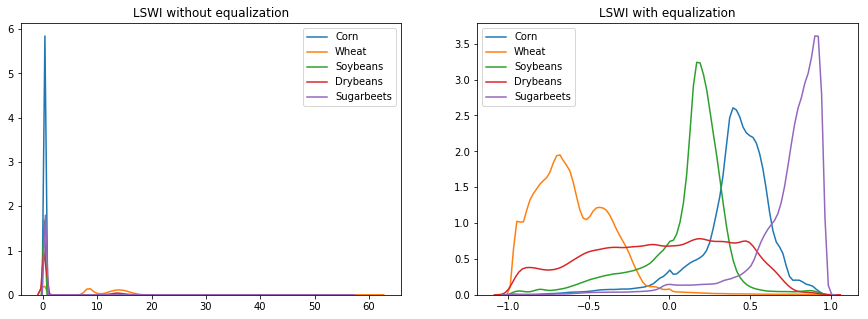

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(lswi_1_wo_equalization, hist=False,label="Corn")
sns.distplot(lswi_2_wo_equalization, hist=False,label="Wheat")
sns.distplot(lswi_3_wo_equalization, hist=False,label="Soybeans")
sns.distplot(lswi_4_wo_equalization, hist=False,label="Drybeans")
sns.distplot(lswi_5_wo_equalization, hist=False,label="Sugarbeets")
plt.title("LSWI without equalization")
plt.subplot(122)
sns.distplot(lswi_1, hist=False,label="Corn")
sns.distplot(lswi_2, hist=False,label="Wheat")
sns.distplot(lswi_3, hist=False,label="Soybeans")
sns.distplot(lswi_4, hist=False,label="Drybeans")
sns.distplot(lswi_5, hist=False,label="Sugarbeets")
plt.title("LSWI with equalization")
plt.show()

# 2D Visualization

In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=2)

In [30]:
X_pca = pca.fit_transform(X)

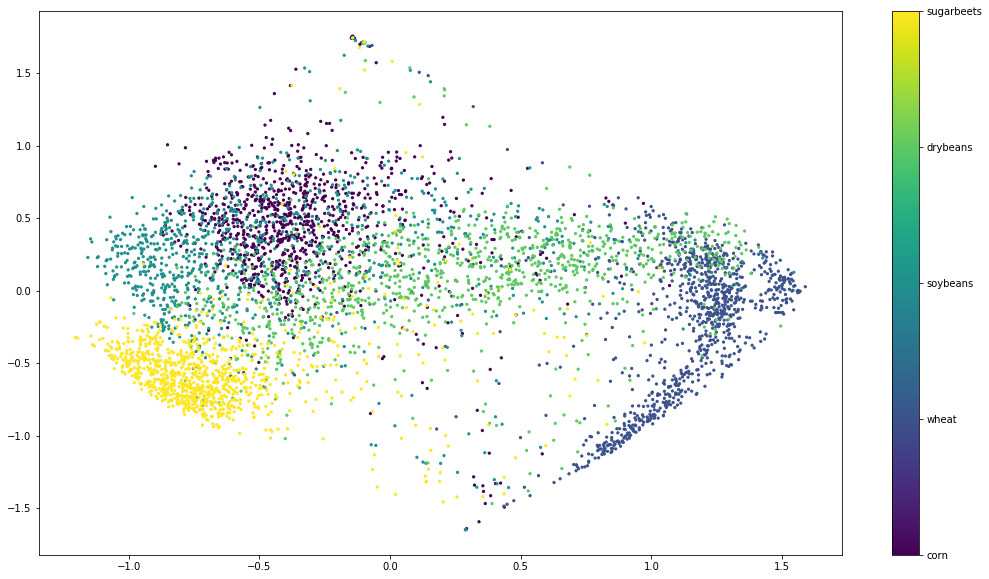

In [239]:
plt.figure(figsize=(18,10))
plt.scatter(X_pca[:,0], X_pca[:,1], s=5, c=labels)
cbar = plt.colorbar(ticks=[0,1,2,3,4])
cbar.ax.set_yticklabels(['corn', 'wheat', 'soybeans', 'drybeans', 'sugarbeets'])
plt.show()

In [32]:
from sklearn.manifold import TSNE

In [33]:
tsne = TSNE(n_components=2)

In [34]:
X_tsne = tsne.fit_transform(X)

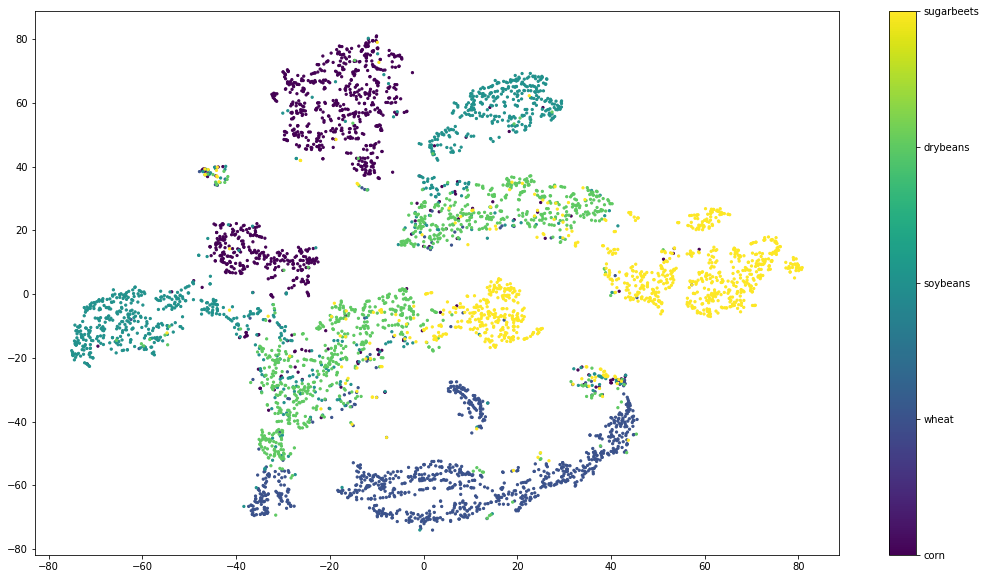

In [240]:
plt.figure(figsize=(18,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], s=5, c=labels)
cbar = plt.colorbar(ticks=[0,1,2,3,4])
cbar.ax.set_yticklabels(['corn', 'wheat', 'soybeans', 'drybeans', 'sugarbeets'])
plt.show()

# 5-Class Classification

In [42]:
from tqdm import tqdm

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Use 5-fold CV to compute the dependence of different classifiers on the number of training samples.

In [43]:
clf = [RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC()]
scores_total=[]
for each in clf:
    scores=[]
    for i in tqdm(np.arange(20,2000,100)):
        corn = np.where(crops==1)
        wheat = np.where(crops==23)
        soybeans = np.where(crops==5)
        drybeans = np.where(crops==42)
        sugarbeets = np.where(crops==41)

        sample_size = i
        r = np.random.RandomState(26).choice(range(len(corn[0])), size=sample_size, replace=False)
        corn = (corn[0][r], corn[1][r])
        r = np.random.RandomState(26).choice(range(len(wheat[0])), size=sample_size, replace=False)
        wheat = (wheat[0][r], wheat[1][r])
        r = np.random.RandomState(26).choice(range(len(soybeans[0])), size=sample_size, replace=False)
        soybeans = (soybeans[0][r], soybeans[1][r])
        r = np.random.RandomState(26).choice(range(len(drybeans[0])), size=sample_size, replace=False)
        drybeans = (drybeans[0][r], drybeans[1][r])
        r = np.random.RandomState(26).choice(range(len(sugarbeets[0])), size=sample_size, replace=False)
        sugarbeets = (sugarbeets[0][r], sugarbeets[1][r])

        X_corn = np.stack([band_01[corn], band_02[corn], band_03[corn], band_04[corn], band_05[corn], band_06[corn], band_07[corn],
                           band_08[corn], band_8A[corn], band_09[corn], band_10[corn], band_11[corn], band_12[corn],
                           ndvi[corn], lswi[corn]], axis=1)

        X_wheat = np.stack([band_01[wheat], band_02[wheat], band_03[wheat], band_04[wheat], band_05[wheat], band_06[wheat], band_07[wheat],
                            band_08[wheat], band_8A[wheat], band_09[wheat], band_10[wheat], band_11[wheat], band_12[wheat],
                           ndvi[wheat], lswi[wheat]], axis=1)

        X_soybeans = np.stack([band_01[soybeans], band_02[soybeans], band_03[soybeans], band_04[soybeans], band_05[soybeans], 
                               band_06[soybeans], band_07[soybeans], band_08[soybeans], band_8A[soybeans], band_09[soybeans],
                               band_10[soybeans], band_11[soybeans], band_12[soybeans],
                              ndvi[soybeans], lswi[soybeans]], axis=1)

        X_drybeans = np.stack([band_01[drybeans], band_02[drybeans], band_03[drybeans], band_04[drybeans], band_05[drybeans],
                           band_06[drybeans], band_07[drybeans], band_08[drybeans], band_8A[drybeans], band_09[drybeans], 
                           band_10[drybeans], band_11[drybeans], band_12[drybeans],
                          ndvi[drybeans], lswi[drybeans]], axis=1)

        X_sugarbeets = np.stack([band_01[sugarbeets], band_02[sugarbeets], band_03[sugarbeets], band_04[sugarbeets], band_05[sugarbeets],
                             band_06[sugarbeets], band_07[sugarbeets], band_08[sugarbeets], band_8A[sugarbeets], band_09[sugarbeets],
                             band_10[sugarbeets], band_11[sugarbeets], band_12[sugarbeets],
                            ndvi[sugarbeets], lswi[sugarbeets]], axis=1)

        X = np.vstack((X_corn, X_wheat, X_soybeans, X_drybeans, X_sugarbeets))
        labels = np.hstack(([0]*len(X_corn), [1]*len(X_wheat), [2]*len(X_soybeans), [3]*len(X_drybeans), [4]*len(X_sugarbeets)))
        score = cross_val_score(each, X, labels, scoring='accuracy', cv=5)
        scores.append([np.mean(score), np.var(score)])
    scores_total.append(scores)

100%|██████████| 20/20 [01:13<00:00,  3.67s/it]


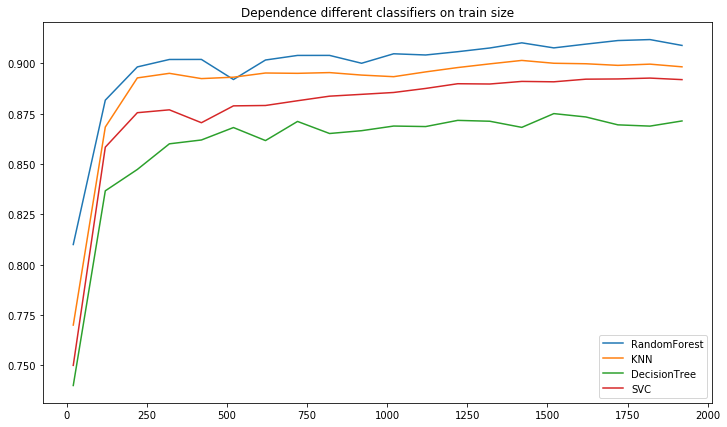

In [45]:
plt.figure(figsize=(12,7))
plt.plot(np.arange(20,2000,100), [score[0] for score in scores_total[0]],label="RandomForest")
plt.plot(np.arange(20,2000,100), [score[0] for score in scores_total[1]],label="KNN")
plt.plot(np.arange(20,2000,100), [score[0] for score in scores_total[2]],label="DecisionTree")
plt.plot(np.arange(20,2000,100), [score[0] for score in scores_total[3]],label="SVC")
#plt.fill_between(np.arange(20,2000,100), [score[0]-10*score[1] for score in scores],[score[0]+10*score[1] for score in scores], alpha=.5)
plt.legend()
plt.title("Dependence different classifiers on train size")
plt.show()

# Grid Search for the best classifiers' parameters.

We've reserved the left upper corner of our experimental image as a hold out data.

In [70]:
test_area = np.zeros_like(crops[:1000,-1000:])
test_area[np.where(crops[:1000,-1000:]==1)] = 1
test_area[np.where(crops[:1000,-1000:]==23)] = 2
test_area[np.where(crops[:1000,-1000:]==5)] = 3
test_area[np.where(crops[:1000,-1000:]==42)] = 4
test_area[np.where(crops[:1000,-1000:]==41)] = 5

band_01_test = band_01[:1000,-1000:]
band_02_test = band_02[:1000,-1000:]
band_03_test = band_03[:1000,-1000:]
band_04_test = band_04[:1000,-1000:]
band_05_test = band_05[:1000,-1000:]
band_06_test = band_06[:1000,-1000:]
band_07_test = band_07[:1000,-1000:]
band_08_test = band_08[:1000,-1000:]
band_8A_test = band_8A[:1000,-1000:]
band_09_test = band_09[:1000,-1000:]
band_10_test = band_10[:1000,-1000:]
band_11_test = band_11[:1000,-1000:]
band_12_test = band_12[:1000,-1000:]

ndvi_test = (band_08_test - band_04_test) / (band_08_test + band_04_test)
lswi_test = (band_08_test - band_11_test) / (band_08_test + band_11_test)

In [71]:
train_area = crops[1000:,:-1000]
band_01_train = band_01[1000:,:-1000]
band_02_train = band_02[1000:,:-1000]
band_03_train = band_03[1000:,:-1000]
band_04_train = band_04[1000:,:-1000]
band_05_train = band_05[1000:,:-1000]
band_06_train = band_06[1000:,:-1000]
band_07_train = band_07[1000:,:-1000]
band_08_train = band_08[1000:,:-1000]
band_8A_train = band_8A[1000:,:-1000]
band_09_train = band_09[1000:,:-1000]
band_10_train = band_10[1000:,:-1000]
band_11_train = band_11[1000:,:-1000]
band_12_train = band_12[1000:,:-1000]

In [72]:
def generate_samples(crops, band_01, band_02, band_03, band_04, band_05, band_06, band_07,
                     band_08, band_8A, band_09, band_10, band_11, band_12, sample_size=None):
    ndvi = (band_08 - band_04) / (band_08 + band_04)
    lswi = (band_08 - band_11) / (band_08 + band_11)

    corn = np.where(crops==1)
    wheat = np.where(crops==23)
    soybeans = np.where(crops==5)
    drybeans = np.where(crops==42)
    sugarbeets = np.where(crops==41)

    if sample_size:
        r = np.random.RandomState(26).choice(range(len(corn[0])), size=sample_size, replace=False)
        corn = (corn[0][r], corn[1][r])
        r = np.random.RandomState(26).choice(range(len(wheat[0])), size=sample_size, replace=False)
        wheat = (wheat[0][r], wheat[1][r])
        r = np.random.RandomState(26).choice(range(len(soybeans[0])), size=sample_size, replace=False)
        soybeans = (soybeans[0][r], soybeans[1][r])
        r = np.random.RandomState(26).choice(range(len(drybeans[0])), size=sample_size, replace=False)
        drybeans = (drybeans[0][r], drybeans[1][r])
        r = np.random.RandomState(26).choice(range(len(sugarbeets[0])), size=sample_size, replace=False)
        sugarbeets = (sugarbeets[0][r], sugarbeets[1][r])

    X_corn = np.stack([band_01[corn], band_02[corn], band_03[corn], band_04[corn], band_05[corn], band_06[corn], band_07[corn],
                       band_08[corn], band_8A[corn], band_09[corn], band_10[corn], band_11[corn], band_12[corn],
                       ndvi[corn], lswi[corn]], axis=1)

    X_wheat = np.stack([band_01[wheat], band_02[wheat], band_03[wheat], band_04[wheat], band_05[wheat], band_06[wheat], band_07[wheat],
                        band_08[wheat], band_8A[wheat], band_09[wheat], band_10[wheat], band_11[wheat], band_12[wheat],
                       ndvi[wheat], lswi[wheat]], axis=1)

    X_soybeans = np.stack([band_01[soybeans], band_02[soybeans], band_03[soybeans], band_04[soybeans], band_05[soybeans], 
                           band_06[soybeans], band_07[soybeans], band_08[soybeans], band_8A[soybeans], band_09[soybeans],
                           band_10[soybeans], band_11[soybeans], band_12[soybeans],
                          ndvi[soybeans], lswi[soybeans]], axis=1)

    X_drybeans = np.stack([band_01[drybeans], band_02[drybeans], band_03[drybeans], band_04[drybeans], band_05[drybeans],
                           band_06[drybeans], band_07[drybeans], band_08[drybeans], band_8A[drybeans], band_09[drybeans], 
                           band_10[drybeans], band_11[drybeans], band_12[drybeans],
                          ndvi[drybeans], lswi[drybeans]], axis=1)

    X_sugarbeets = np.stack([band_01[sugarbeets], band_02[sugarbeets], band_03[sugarbeets], band_04[sugarbeets], band_05[sugarbeets],
                             band_06[sugarbeets], band_07[sugarbeets], band_08[sugarbeets], band_8A[sugarbeets], band_09[sugarbeets],
                             band_10[sugarbeets], band_11[sugarbeets], band_12[sugarbeets],
                            ndvi[sugarbeets], lswi[sugarbeets]], axis=1)

    X = np.vstack((X_corn, X_wheat, X_soybeans, X_drybeans, X_sugarbeets))
    y = np.hstack(([1]*len(X_corn), [2]*len(X_wheat), [3]*len(X_soybeans), [4]*len(X_drybeans), [5]*len(X_sugarbeets)))
    return X, y

In [73]:
X_train, y_train = generate_samples(train_area, band_01_train, band_02_train, band_03_train, band_04_train, band_05_train, band_06_train,
                 band_07_train, band_08_train, band_8A_train, band_09_train, band_10_train, band_11_train, band_12_train, 500)

In [74]:
X_test = np.dstack([band_01_test.flatten(), band_02_test.flatten(), band_03_test.flatten(), band_04_test.flatten(),
                    band_05_test.flatten(), band_06_test.flatten(), band_07_test.flatten(), band_08_test.flatten(), 
                    band_8A_test.flatten(), band_09_test.flatten(), band_10_test.flatten(), band_11_test.flatten(), 
                    band_12_test.flatten(), ndvi_test.flatten(), lswi_test.flatten()]).reshape(1000000,15)

RandomForest

In [54]:
from sklearn.model_selection import GridSearchCV, KFold

In [133]:
parameters_rf = {'n_estimators': [10, 20,50,75,100,125,150], 'max_depth':[6,10,20,50,100]}
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)
rf = GridSearchCV(RandomForestClassifier(), param_grid = parameters_rf, cv=kfold,n_jobs=-1)
rf.fit(X_train, y_train)
print(rf.best_params_)
print(rf.best_score_)

{'max_depth': 100, 'n_estimators': 125}
0.9148


KNN

In [134]:
parameters_knn = {'n_neighbors': [5, 10, 15, 20,25,50], 'metric':['euclidean','chebyshev','minkowski','manhattan']}
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)
knn = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_knn, cv=kfold,n_jobs=-1)
knn.fit(X_train, y_train)
print(knn.best_params_)
print(knn.best_score_)

{'metric': 'manhattan', 'n_neighbors': 5}
0.8896


DecisionTree

In [135]:
parameters_dt = {'max_depth':[6,10,20,50,100,150,500]}
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)
dt = GridSearchCV(RandomForestClassifier(), param_grid = parameters_dt, cv=kfold,n_jobs=-1)
dt.fit(X_train, y_train)
print(dt.best_params_)
print(dt.best_score_)

{'max_depth': 100}
0.9068


LogisticRegression

SVC

In [136]:
parameters_svc = {'C':[0.0001,0.001,0.01,0.1,1.0,10.0,100.0],}
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)
svc = GridSearchCV(SVC(), param_grid = parameters_svc, cv=kfold,n_jobs=-1)
svc.fit(X_train, y_train)
print(svc.best_params_)
print(svc.best_score_)

{'C': 100.0}
0.9168


Save best estimators

In [80]:
RF = rf.best_estimator_
KNN = knn.best_estimator_
DT = dt.best_estimator_
SVM = svc.best_estimator_

# Visualize Predictions

In [60]:
from sklearn.metrics import accuracy_score

In [117]:
predictions_rf = np.zeros_like(test_area.flatten())
predictions_knn = np.zeros_like(test_area.flatten())
predictions_dt = np.zeros_like(test_area.flatten())
predictions_svc = np.zeros_like(test_area.flatten())

predictions_rf[np.where(test_area.flatten()!=0)] = RF.predict(X_test[np.where(test_area.flatten()!=0)])
predictions_knn[np.where(test_area.flatten()!=0)] = KNN.predict(X_test[np.where(test_area.flatten()!=0)])
predictions_dt[np.where(test_area.flatten()!=0)] = DT.predict(X_test[np.where(test_area.flatten()!=0)])
predictions_svc[np.where(test_area.flatten()!=0)] = SVM.predict(X_test[np.where(test_area.flatten()!=0)])

In [125]:
score=[]
score.append(accuracy_score(test_area.flatten()[np.where(test_area.flatten()!=0)], 
                            predictions_rf[np.where(test_area.flatten()!=0)]))
score.append(accuracy_score(test_area.flatten()[np.where(test_area.flatten()!=0)],
                            predictions_knn[np.where(test_area.flatten()!=0)]))
score.append(accuracy_score(test_area.flatten()[np.where(test_area.flatten()!=0)],
                            predictions_dt[np.where(test_area.flatten()!=0)]))
score.append(accuracy_score(test_area.flatten()[np.where(test_area.flatten()!=0)], 
                            predictions_svc[np.where(test_area.flatten()!=0)]))

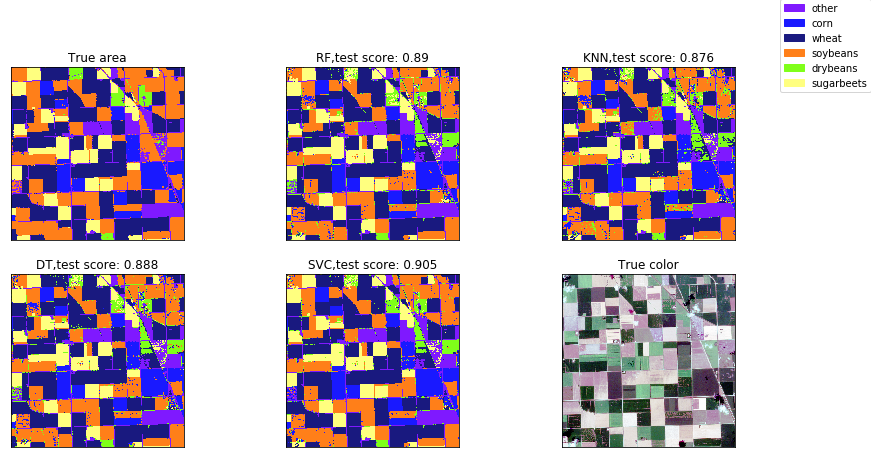

In [185]:
# create plot

cmap = {0:[0.5,0.1,1.0,1],1:[0.1,0.1,1.0,1],2:[0.1,0.1,0.5,1],3:[1.0,0.5,0.1,1],4:[0.5,1.0,0.1,1],5:[1.0,1.0,0.5,1]}
labels = {0:'other',1:'corn',2:'wheat',3:'soybeans',4:'drybeans',5:'sugarbeets'}

fig = plt.figure(figsize=(14, 7))
plt1=fig.add_subplot(231, title="True area")
plt.xticks([])
plt.yticks([])
arrayShow = np.array([[cmap[i] for i in j] for j in test_area]) 
plt1.imshow(arrayShow)

plt2=fig.add_subplot(232,title="RF,test score: "+str(round(score[0],3)))
plt.xticks([])
plt.yticks([])
arrayShow = np.array([[cmap[i] for i in j] for j in predictions_rf.reshape((1000,1000))]) 
plt2.imshow(arrayShow)

plt3=fig.add_subplot(233,title="KNN,test score: "+str(round(score[1],3)))
plt.xticks([])
plt.yticks([])
arrayShow = np.array([[cmap[i] for i in j] for j in predictions_knn.reshape((1000,1000))]) 
plt3.imshow(arrayShow)

plt4=fig.add_subplot(234,title="DT,test score: "+str(round(score[2],3)))
plt.xticks([])
plt.yticks([])
arrayShow = np.array([[cmap[i] for i in j] for j in predictions_dt.reshape((1000,1000))]) 
plt4.imshow(arrayShow)

plt5=fig.add_subplot(235,title="SVC,test score: "+str(round(score[3],3)))
plt.xticks([])
plt.yticks([])
arrayShow = np.array([[cmap[i] for i in j] for j in predictions_svc.reshape((1000,1000))]) 
plt5.imshow(arrayShow)

plt6=fig.add_subplot(236,title="True color")
plt.xticks([])
plt.yticks([])
plt6.imshow(np.dstack([band_04[:1000,-1000:], band_03[:1000,-1000:], band_02[:1000,-1000:]]))

patches =[mpatches.Patch(color=cmap[i],label=labels[i]) for i in cmap]
fig.legend(handles=patches, labels=labels.values(), loc=1, borderaxespad=0.)
plt.show()

In [199]:
from sklearn.metrics import confusion_matrix
import itertools

In [210]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

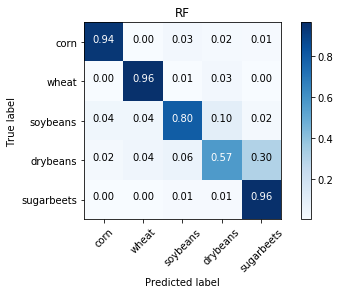

In [214]:
cm = confusion_matrix(test_area.flatten()[np.where(test_area.flatten()!=0)], 
                            predictions_rf[np.where(test_area.flatten()!=0)])
plot_confusion_matrix(cm, normalize=True, classes=['corn', 'wheat', 'soybeans', 'drybeans', 'sugarbeets'], title='RF')

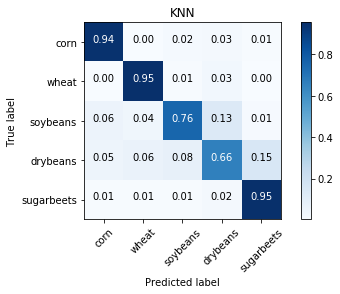

In [215]:
cm = confusion_matrix(test_area.flatten()[np.where(test_area.flatten()!=0)], 
                            predictions_knn[np.where(test_area.flatten()!=0)])
plot_confusion_matrix(cm, normalize=True, classes=['corn', 'wheat', 'soybeans', 'drybeans', 'sugarbeets'], title='KNN')

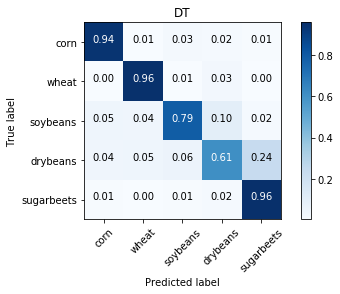

In [216]:
cm = confusion_matrix(test_area.flatten()[np.where(test_area.flatten()!=0)], 
                            predictions_dt[np.where(test_area.flatten()!=0)])
plot_confusion_matrix(cm, normalize=True, classes=['corn', 'wheat', 'soybeans', 'drybeans', 'sugarbeets'], title='DT')

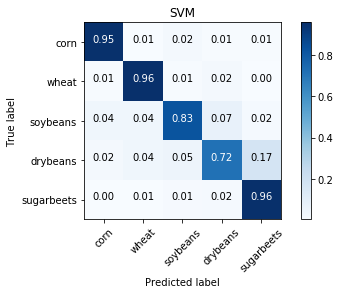

In [217]:
cm = confusion_matrix(test_area.flatten()[np.where(test_area.flatten()!=0)], 
                            predictions_svc[np.where(test_area.flatten()!=0)])
plot_confusion_matrix(cm, normalize=True, classes=['corn', 'wheat', 'soybeans', 'drybeans', 'sugarbeets'], title='SVM')